In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the data
df = pd.read_csv('/content/drive/MyDrive/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
# Extracting the features X and the target y
x = df[['age', 'bmi']].values
y = df['charges'].values  # Target variable

In [ ]:
# Splitting into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Adding a column of ones for the intercept term
x_train = np.hstack([np.ones((x_train.shape[0], 1)), x_train])
x_test = np.hstack([np.ones((x_test.shape[0], 1)), x_test])


In [ ]:
# Perform MultipleLinear Reg

def multiple_linear_regression(x, y, learning_rate, epochs):
    m, n = x.shape
    weights = np.zeros(n)
    cost_list = []

    for epoch in range(epochs):
        predictions = np.dot(x, weights)
        error = predictions - y  # Ensure error shape matches y
        gradient = np.dot(x.T, error) / m
        weights -= learning_rate * gradient

        cost = (1 / (2 * m)) * np.sum(error ** 2)
        cost_list.append(cost)

        if epoch % 100 == 0:  # Print progress every 100 epochs
            print(f"Epoch {epoch}: Cost {cost}")

    return weights, cost_list

In [ ]:
# Training the model
weights, cost_list = multiple_linear_regression(x_train, y_train, learning_rate=0.0001, epochs=1000)

# Predicting the values
y_pred_test = np.dot(x_test, weights)

# Calculating Regression metrics
mse = np.mean((y_test - y_pred_test) ** 2)
mae = np.mean(np.abs(y_test - y_pred_test))
rmse = np.sqrt(mse)
total_variance = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (mse / total_variance)

Epoch 0: Cost 161225866.59212065
Epoch 100: Cost 64975324.19575683
Epoch 200: Cost 64965788.19089871
Epoch 300: Cost 64963810.72447487
Epoch 400: Cost 64963197.72466674
Epoch 500: Cost 64962831.1713182
Epoch 600: Cost 64962509.26347685
Epoch 700: Cost 64962195.5762907
Epoch 800: Cost 64961883.53502935
Epoch 900: Cost 64961571.95286167


In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r_squared}")

Mean Squared Error: 133920828.24791946
Mean Absolute Error: 9339.522609432992
Root Mean Squared Error: 11572.41669868137
R-squared: 0.9967812646311953


In [ ]:
# Actual VS Predicted Values

results = pd.DataFrame({'Actual Values': y_test,
                        'Predicted Values': y_pred_test,
                        'Difference(Actual - Predicted)': y_test - y_pred_test
                        })
results

,Actual Values,Predicted Values,Difference(Actual - Predicted)
0,9095.06825,13600.761582,-4505.693332
1,5272.17580,12761.972311,-7489.796511
2,29330.98315,17647.724721,11683.258429
3,9301.89355,13905.277373,-4603.383823
4,33750.29180,9794.975745,23955.316055
...,...,...,...
263,47055.53210,19016.267452,28039.264648
264,12222.89830,16527.032462,-4304.134162
265,6067.12675,12773.278712,-6706.151962
266,63770.42801,19602.676182,44167.751828


In [ ]:
# Import The Libraries
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame
data = {'Actual Values': y_test,
        'Predicted Values': y_pred_test,
        }
df = pd.DataFrame(data)

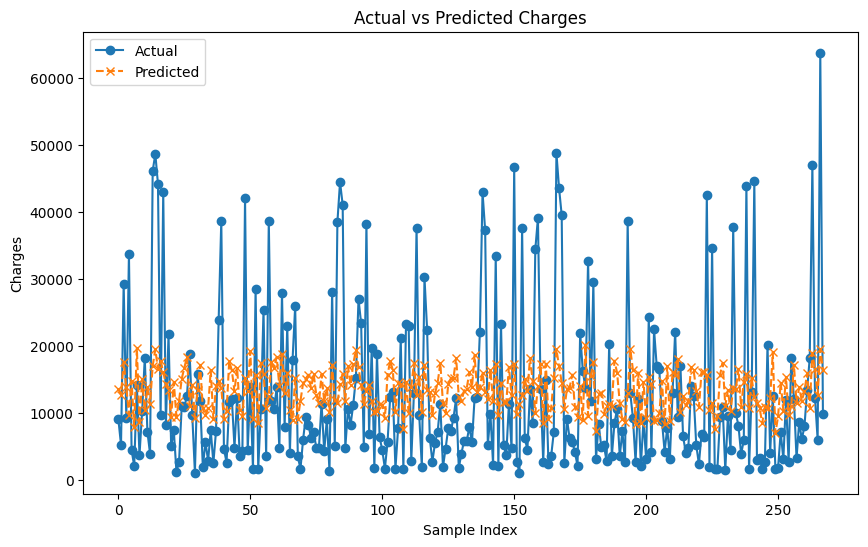

In [ ]:
# Create a line Chart
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Actual Values'], label='Actual', linestyle='-', marker='o')
plt.plot(df.index, df['Predicted Values'], label='Predicted', linestyle='--', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Charges')
plt.title('Actual vs Predicted Charges')
plt.legend()
plt.show()